In [1]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
"""
2023-11-03 11:22:10,393 P1065907 INFO Neg Logit Abs Grad : 5.648651040246477e-06, 4.1834242438199e-05, 0.00011756400635931641, 5.201305975788273e-05
2023-11-03 11:22:10,397 P1065907 INFO Neg Logit Grad : 5.648651040246477e-06, 4.1834242438199e-05, 0.00011756400635931641, 5.201305975788273e-05
2023-11-03 11:22:10,400 P1065907 INFO Last Layer Abs Grad : 2.5608183022995945e-06, 6.187751569086686e-05, 0.0008052042685449123, 0.00038990224129520357
2023-11-03 11:22:10,403 P1065907 INFO Last Layer Grad : -0.0005061148549430072, -1.226409585797228e-05, 0.00011104519944638014, -8.493570021528285e-06
2023-11-03 11:22:10,406 P1065907 INFO 0 DNN Abs Grad : 3.580503715738814e-08, 3.7131204067009094e-07, 8.035558494157158e-06, 4.073399395565502e-06
2023-11-03 11:22:10,409 P1065907 INFO 0 DNN Grad : -2.027686377914506e-06, 1.2428467976999258e-11, 2.175485406041844e-06, 1.951001564748367e-07
2023-11-03 11:22:10,413 P1065907 INFO 3 DNN Abs Grad : 2.5816881965567973e-10, 1.2663550705838134e-06, 1.5794399587321095e-05, 5.7301585911773145e-06
2023-11-03 11:22:10,416 P1065907 INFO 3 DNN Grad : -8.50587366585387e-06, 0.0, 6.986886091908673e-06, -6.915529979778512e-07
2023-11-03 11:22:10,418 P1065907 INFO 6 DNN Abs Grad : 0.0, 3.4255776881764177e-07, 1.210761911352165e-05, 4.8611886995786335e-06
2023-11-03 11:22:10,421 P1065907 INFO 6 DNN Grad : -5.147950105310883e-06, 0.0, 3.815062427747762e-06, -6.831871246504306e-07
2023-11-03 11:22:10,425 P1065907 INFO 0 CN Abs Grad : 6.138853869686045e-10, 9.5225827223544e-09, 4.4352444206197106e-07, 7.595785973535385e-07
2023-11-03 11:22:10,428 P1065907 INFO 0 CN Grad : -1.2089753909094725e-07, -4.053600510811606e-11, 1.1246763165217999e-07, -4.2880010653334466e-08
2023-11-03 11:22:10,431 P1065907 INFO 1 CN Abs Grad : 5.869797425894774e-10, 9.342397966349836e-09, 4.3221359646850033e-07, 7.366648446804902e-07
2023-11-03 11:22:10,435 P1065907 INFO 1 CN Grad : -1.1777973440985079e-07, -4.9624849368656854e-11, 1.0906058633963767e-07, -4.715721502179804e-08
2023-11-03 11:22:10,440 P1065907 INFO 2 CN Abs Grad : 5.037210648595192e-10, 8.807695905943547e-09, 4.094317205272091e-07, 7.16501517672441e-07
2023-11-03 11:22:10,443 P1065907 INFO 2 CN Grad : -1.1265598232057528e-07, -3.6082348914279194e-11, 1.0401120675851416e-07, -4.375235462816818e-08

"""
pattern1 = r"Neg Logit Abs Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern2 = r"Neg Logit Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern3 = r"Last Layer Abs Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern4 = r"Last Layer Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern5 = r"(\d*) DNN Abs Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern6 = r"(\d*) DNN Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern7 = r"(\d*) CN Abs Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern8 = r"(\d*) CN Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern9 = r"Neg Click Logit Abs Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern10 = r"Neg Click Logit Grad : (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"

In [2]:
def parse_log(curr_name,path):
    
    with open(path,'r') as f:
        logs = f.readlines()

    
    neg_logit_abs_grad, neg_logit_grad = [], []
    last_layer_abs_grad, last_layer_grad= [], []
    dnn_abs_grad, dnn_grad = dict(), dict()
    cn_abs_grad, cn_grad = dict(), dict()
    neg_click_logit_abs_grad, neg_click_logit_grad = [], []
    
    for line in logs:
        match1 = re.search(pattern1, line)
        match2 = re.search(pattern2, line)
        match3 = re.search(pattern3, line)
        match4 = re.search(pattern4, line)
        match5 = re.search(pattern5, line)
        match6 = re.search(pattern6, line)
        match7 = re.search(pattern7, line)
        match8 = re.search(pattern8, line)
        match9 = re.search(pattern9, line)
        match10 = re.search(pattern10, line)
        if match1:
            neg_logit_abs_grad.append([float(match1.group(i)) for i in range(1,5)])
        if match2:
            neg_logit_grad.append([float(match2.group(i)) for i in range(1,5)])
        if match3:
            last_layer_abs_grad.append([float(match3.group(i)) for i in range(1,5)])
        if match4:
            last_layer_grad.append([float(match4.group(i)) for i in range(1,5)])
        if match5:
            idx = int(match5.group(1))
            val = [float(match5.group(i)) for i in range(2,6)]
            if idx in dnn_abs_grad:
                dnn_abs_grad[idx].append(val)
            else:
                dnn_abs_grad[idx] = [val]
        if match6:
            idx = int(match6.group(1))
            val = [float(match6.group(i)) for i in range(2,6)]
            if idx in dnn_grad:
                dnn_grad[idx].append(val)
            else:
                dnn_grad[idx] = [val]
        if match7:
            idx = int(match7.group(1))
            val = [float(match7.group(i)) for i in range(2,6)]
            if idx in cn_abs_grad:
                cn_abs_grad[idx].append(val)
            else:
                cn_abs_grad[idx] = [val]
        if match8:
            idx = int(match8.group(1))
            val = [float(match8.group(i)) for i in range(2,6)]
            if idx in cn_grad:
                cn_grad[idx].append(val)
            else:
                cn_grad[idx] = [val]
        if match9:
            neg_click_logit_abs_grad.append([float(match9.group(i)) for i in range(1,5)])
        if match10:
            neg_click_logit_grad.append([float(match10.group(i)) for i in range(1,5)])
    return {
        'name':curr_name,
        'neg_logit_abs_grad':neg_logit_abs_grad,
        'neg_logit_grad':neg_logit_grad,
        'last_layer_abs_grad':last_layer_abs_grad,
        'last_layer_grad':last_layer_grad,
        'dnn_abs_grad':dnn_abs_grad,
        'dnn_grad':dnn_grad,
        'cn_abs_grad':cn_abs_grad,
        'cn_grad':cn_grad,
        'neg_click_logit_abs_grad':neg_click_logit_abs_grad,
        'neg_click_logit_grad':neg_click_logit_grad
    }


In [3]:
bce_dict= parse_log('BCE','../../Criteo/DCNv2_criteo_x1/criteo_x1/bce_posw0.1_layer_grad.log')
jrc_dict= parse_log('JRC','../../Criteo/DCNv2_criteo_x1/criteo_x1/jrc_posw0.1_layer_grad.log')
twitter_dict= parse_log('Twitter','../../Criteo/DCNv2_criteo_x1/criteo_x1/combined_pair_posw0.1_layer_grad.log')

In [4]:
def mv_step(arr, step, window):
    ret = []
    for i in range(0,len(arr),step):
        if i ==0: continue
        else:
            ret.append(np.mean(arr[i-window+1: i+1]))
    return ret

def arr_div(a,b):
    return np.array(a)/np.array(b)

def sum_ratio(grad,num, target_index):
    base = grad* num
    return base[:,target_index]/np.sum(base,axis=1)

In [5]:
def parse_name_layer(ret_dict, name, layer):
    return ret_dict[name][layer]
def report_layers(ret_dict, name):
    print(ret_dict[name].keys())
report_layers(bce_dict, 'dnn_grad')
report_layers(bce_dict, 'cn_grad')

DNN_layers = [0, 3, 6]
CN_layers = [0, 1, 2]

dict_keys([0, 3, 6])
dict_keys([0, 1, 2])


In [6]:
high_mark = '2' # 'tri_up'
middle_mark = '+'# 'plus'
low_mark = '1' # 'tri_down'
mean_mark = 'x'#'vline'

twitter_color = '#D9383A'
bce_color = '#5F98D2'
jrc_color='#96C37D'

In [15]:
set_alpha=1.
set_linewidth=0.2
def plot_scatter_on_layer(whose, which_stat, which_layer, color, begin=0,end=-1,step=1,draw=['low','high','mid','mean'],input_ax=plt):
    if which_layer is None:
        target = np.array(whose[which_stat])
    else:
        target = np.array(parse_name_layer(whose,which_stat,which_layer))
        
    ret = {}
    if 'low'in draw:
        ret['low']=input_ax.plot(range(len(target))[begin:end:step],target[:,0][begin:end:step], marker=low_mark, color=color,alpha=set_alpha,linewidth=set_linewidth, ls='-')
    if 'mid' in draw:
        ret['mid']=input_ax.scatter(range(len(target))[begin:end:step],target[:,1][begin:end:step], marker=middle_mark,color=color,alpha=set_alpha,linewidths=set_linewidth, ls='-')
    if 'high' in draw:
        ret['high']=input_ax.plot(range(len(target))[begin:end:step],target[:,2][begin:end:step], marker=high_mark,color=color,alpha=set_alpha,linewidth=set_linewidth, ls='-')
    if 'mean' in draw:
        ret['mean']=input_ax.plot(range(len(target))[begin:end:step],target[:,3][begin:end:step], marker=mean_mark,color=color,alpha=set_alpha,linewidth=set_linewidth, ls='-')
    return ret
def scatter_skip_layer(which_stat, which_layer, begin=0,end=-1,step=1,draw=['low','high','mid','mean'],input_ax=plt):
    """Plot三个方法，每个方法按要求跳跃: mean是滑窗，skip是采样"""
    bce_ret = plot_scatter_on_layer(bce_dict, which_stat,which_layer,bce_color,begin,end,step,draw,input_ax)
    combined_pair_ret = plot_scatter_on_layer(twitter_dict, which_stat,which_layer,twitter_color,begin,end,step,draw,input_ax)
    return bce_ret, combined_pair_ret
    

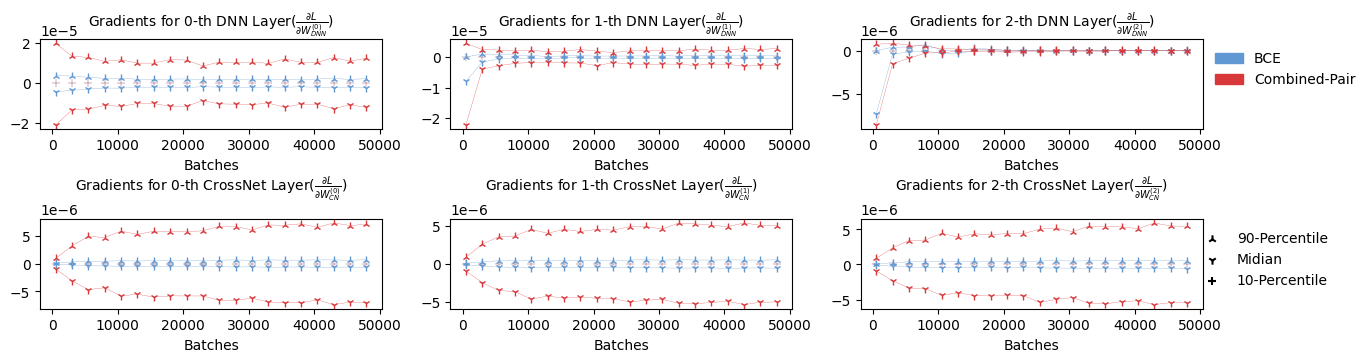

In [8]:

legend_elements = [
    Patch(color=bce_color, label='BCE'),
    Patch(color=twitter_color, label='Combined-Pair'),
    # Patch(color=jrc_color, label='JRC'),
]
# fig, axes = plt.subplots(2, 3, figsize=(11, 3.5))
fig, axes = plt.subplots(2, 3, figsize=(15, 3.5))

names = ['dnn_grad','cn_grad']
layers = [[0, 3, 6],[0, 1, 2]]

for i in range(2):
    for j in range(3):
        ax = axes[i, j] 
        scatter_skip_layer(
        which_stat=names[i],
        which_layer=layers[i][j],
        begin=500,end=-1,step=2500,
        draw=['low','high','mid'],input_ax=ax)
        # ax.set_title(r"$\frac{\partial L}{\partial z_j^{(-)}}$")
        if i==0:
            ax.set_title(rf"Gradients for {j}-th DNN Layer($\frac{{\partial L}}{{\partial W^{{({j})}}_{{DNN}}}}$)",fontdict={'size':10})
        else:
            ax.set_title(rf"Gradients for {j}-th CrossNet Layer($\frac{{\partial L}}{{\partial W^{{({j})}}_{{CN}}}}$)",fontdict={'size':10})
        ax.set_xlabel('Batches')

line1 = plt.scatter(x=[],y=[],marker=low_mark,label='10-Percentile',color='k')
line2 = plt.scatter(x=[],y=[],marker=middle_mark,label='Midian',color='k')
line3 = plt.scatter(x=[],y=[],marker=high_mark,label='90-Percentile',color='k')
axes[0,2].legend(handles=legend_elements,bbox_to_anchor=(1,1),frameon=False)
axes[1,2].legend(handles=[line3,line1, line2], labels=['90-Percentile', 'Midian', '10-Percentile'],bbox_to_anchor=(0.95,1),frameon=False)

plt.subplots_adjust(wspace=0.2, hspace=1.)

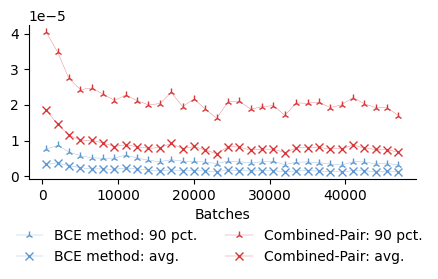

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ret = scatter_skip_layer(
    which_stat='dnn_abs_grad',
    which_layer=layers[0][0],
    begin=500, end=-1, step=1500,
    draw=['high', 'mean'], input_ax=ax
)

ax.set_xlabel('Batches')

legend_handles = []  # 创建一个空的图例对象

for i in range(len(ret)):
    for key in ['high', 'mean']:
        legend_handles.append(ret[i][key][0])  # 将每个对象添加到图例中

ax.legend(handles=legend_handles, labels=['BCE method: 90 pct.', 'BCE method: avg.', 'Combined-Pair: 90 pct.', 'Combined-Pair: avg.'], bbox_to_anchor=(1.05, -0.24), frameon=False, ncols=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.2, hspace=1.2)  # 调整子图间距
plt.savefig('../../../../figure/layers_grad_dnn.pdf', dpi=450, bbox_inches='tight')

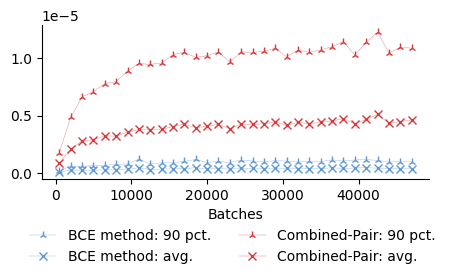

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ret = scatter_skip_layer(
    which_stat='cn_abs_grad',
    which_layer=layers[1][0],
    begin=500, end=-1, step=1500,
    draw=['high', 'mean'], input_ax=ax
)

ax.set_xlabel('Batches')

legend_handles = [] 

for i in range(len(ret)):
    for key in ['high', 'mean']:
        legend_handles.append(ret[i][key][0])  # 将每个对象添加到图例中

ax.legend(handles=legend_handles, labels=['BCE method: 90 pct.', 'BCE method: avg.', 'Combined-Pair: 90 pct.', 'Combined-Pair: avg.'], bbox_to_anchor=(1.05, -0.24), frameon=False, ncols=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.2, hspace=1.2)  # 调整子图间距
plt.savefig('../../../../figure/layers_grad_cn.pdf', dpi=450, bbox_inches='tight')